In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency

In [2]:
#Reading train and test data
train=pd.read_csv('train.csv', index_col="ID")
test=pd.read_csv('test.csv', index_col="ID")

In [3]:
train.shape

(8523, 10)

In [4]:
test.shape

(5681, 9)

In [5]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
FDA15OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
FDW14OUT017,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
NCN55OUT010,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
FDQ58OUT017,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
FDY38OUT027,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [7]:
#Checking variable types
train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Item_Outlet_Sales is our target variable

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
train.loc[train['Item_Fat_Content']=='LF', 'Item_Fat_Content']='Low Fat'
train.loc[train['Item_Fat_Content']=='low fat', 'Item_Fat_Content']='Low Fat'
train.loc[train['Item_Fat_Content']=='reg', 'Item_Fat_Content']='Regular'
test.loc[test['Item_Fat_Content']=='LF', 'Item_Fat_Content']='Low Fat'
test.loc[test['Item_Fat_Content']=='low fat', 'Item_Fat_Content']='Low Fat'
test.loc[test['Item_Fat_Content']=='reg', 'Item_Fat_Content']='Regular'

In [11]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Missing Value Treatment

In [15]:
#Diplay those fields which have null values
train.columns[train.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [16]:
#Diplay those fields which have null values
test.columns[test.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [17]:
# #Imputing Item_Weight with its mean
# train['Item_Weight']=train['Item_Weight'].fillna(np.mean(train['Item_Weight']))
# test['Item_Weight']=test['Item_Weight'].fillna(np.mean(test['Item_Weight']))
# #Imputing Outlet_Size by foward filling it
# train['Outlet_Size']=train['Outlet_Size'].ffill()
# test['Outlet_Size']=test['Outlet_Size'].ffill()

train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].median())
#Imputing Outlet_Size by foward filling it
train['Outlet_Size']=train['Outlet_Size'].ffill()
test['Outlet_Size']=test['Outlet_Size'].ffill()




In [18]:
# #Since visibility of an item can not be 0, we replace it with median
# train['Item_Visibility'].replace(0, np.nan, inplace= True)
# train['Item_Visibility']=train['Item_Visibility'].fillna(train['Item_Visibility'].median())
# test['Item_Visibility'].replace(0, np.nan, inplace= True)
# test['Item_Visibility']=test['Item_Visibility'].fillna(test['Item_Visibility'].median())

In [19]:
#Diplay those fields which have null values
train.columns[train.isna().any()].tolist()

[]

In [20]:
#Diplay those fields which have null values
test.columns[test.isna().any()].tolist()

[]

In [21]:
# This is not required, judt did it to make the data more readable

label_encoding = {
    'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
    'Item_Type': {
        'Fruits and Vegetables': 0,
        'Snack Foods': 1,
        'Household': 2,
        'Frozen Foods': 3,
        'Dairy': 4,
        'Canned': 5,
        'Baking Goods': 6,
        'Health and Hygiene': 7,
        'Soft Drinks': 8,               
        'Meat': 9,                    
        'Breads': 10,                    
        'Hard Drinks': 11,             
        'Starchy Foods': 12,          
        'Breakfast': 13,               
        'Seafood': 14,
        'Others':15,
        },
    'Outlet_Size': {
        'Small': 0,
        'Medium': 1,
        'High': 2,
        },
    'Outlet_Type': {
        'Supermarket Type1': 0,
        'Grocery Store': 1,
        'Supermarket Type2': 2,
        'Supermarket Type3': 3,
        },
    'Outlet_Location_Type': {
        'Tier 1': 0,
        'Tier 2': 1,
        'Tier 3': 2,
        },
    }

In [22]:
train.replace(label_encoding, inplace=True)
test.replace(label_encoding, inplace=True)

# Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88c50656d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88c5065f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88c5065588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88c4ffa828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88c4ffac50>],
 'means': []}

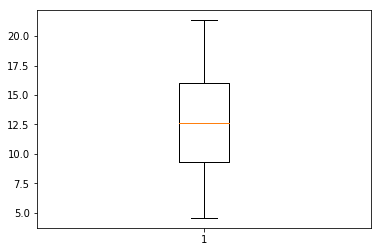

In [23]:
plt.boxplot(train['Item_Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88c4feaeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88c4ff47b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88c4fead68>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88c4f7a048>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88c4f7a470>],
 'means': []}

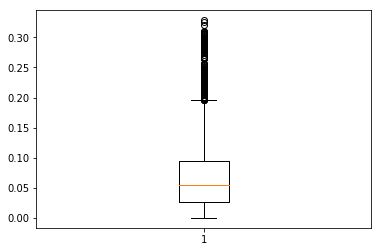

In [24]:
plt.boxplot(train['Item_Visibility'])

In [25]:
train.loc[train['Item_Visibility']>0.30, 'Item_Visibility']=train['Item_Visibility'].median()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88c4f47f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88c4f52860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88c4f47e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88c4f5a0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88c4f5a518>],
 'means': []}

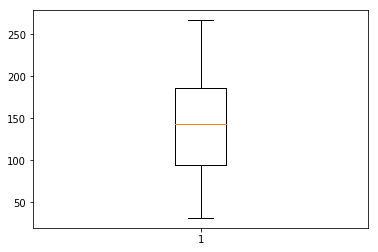

In [26]:
plt.boxplot(train['Item_MRP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88c4f2a550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88c4f2ae10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88c4f2a400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88c4f306a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88c4f30ac8>],
 'means': []}

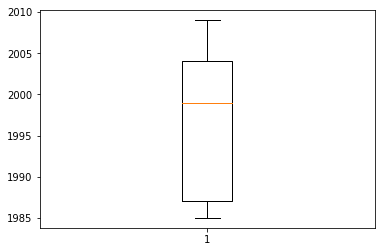

In [27]:
plt.boxplot(train['Outlet_Establishment_Year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88c4e82b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88c4e8b470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88c4e82a20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88c4e8bcc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88c4e92128>],
 'means': []}

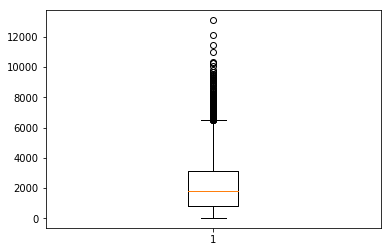

In [28]:
plt.boxplot(train['Item_Outlet_Sales'])

In [29]:
train.loc[train['Item_Outlet_Sales']>11000, 'Item_Visibility']=np.mean(train['Item_Outlet_Sales'])

# Training Model (Linear Regression)

In [30]:
#Importing Linear Regression library
from sklearn.linear_model import LinearRegression

In [31]:
x_train=train.drop('Item_Outlet_Sales', axis=1)
y_train=train['Item_Outlet_Sales']

In [32]:
lreg=LinearRegression()

In [33]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
pred=lreg.predict(test) 

In [35]:
#performance of our model -r2

lreg.score(x_train, y_train)

0.354587302127754

In [36]:
data = {"ID":test.index, "Item_Outlet_Sales":pred}
outdata = pd.DataFrame(data)

In [37]:
outdata.to_csv("sample_submission.csv", index=False)

In [38]:
rmse_train = np.sqrt(np.mean(np.power((np.array(y_train)-np.array(lreg.predict(x_train))),2)))
print(rmse_train)

1370.8800877234498
